## Teste de Ciências de Dados - Cadastra
### Etapa 1 - EDA - Análise Exploratória

### Autor: Leonardo Padilha de Lima
#### (15) 99738-3447
#### leo.plima08@gmail.com

### Objetivo: Desenvolver um modelo para previsão de vendas.

O objetivo desse desafio é desenvolver um modelo para previsão de vendas (sell-out) para integrar o processo de planejamento de demanda do grupo. Este processo tem como objetivo orientar o plano de produção da indústria. Em outras palavras, a partir dessa previsão de vendas a Indústria irá estabelecer quais produtos e quando fabricá-los.

Entregáveis:
1.	Análise exploratória e descritiva dos dados;
2.	Modelo de previsão;

Importante:

●	Justificar a abordagem escolhida para a modelagem;

●	Justificar a escolha da(s) métrica(s) de avaliação do modelo;

●	Separar os entregáveis 1 e 2 em dois Jupyter Notebooks;

●	Utilize os notebooks para responder questionamentos e discutir sobre resultados;

●	Subir os entregáveis no GitHub e enviar o link : https://github.com/leoplima/desafio_cadastra


### 1)	Importação das bibliotecas necessárias

In [55]:
# importação de pacotes básico

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings


%matplotlib inline

warnings.filterwarnings("ignore")

### 2)	Importação das bases de dados fornecidas usando o Pandas e mostrando as cinco primeiras linhas do conjunto de dados.

In [3]:
# importando base de dados

def importar_base():
    '''
    Função que vai importar a base e transformar em uma DataFrame pandas.
    '''
    try:
    
        df = pd.read_csv('dataset.csv', sep = ';')
    
    except Exception as erro:
        print(f'Opa! Um problema de {erro.__class__} foi encontrato.')
    
    return df

In [4]:
df = importar_base()
df.head()

,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO
0,201917,1,431148,anon_S0,anon_S2,anon_S3,anon_S1,"11934,000000",414.0,"431869,080000","431869,080000",0,0,0,0,0,NaN,"455,400000"
1,202005,0,177816,anon_S0,anon_S2,anon_S4,anon_S1,"540,000000",252.0,"27743,400000","27743,400000",0,0,0,0,0,NaN,"773,400000"
2,201901,0,171786,anon_S0,anon_S5,anon_S6,anon_S1,"54012,000000",1410.0,"962860,200000","962860,200000",0,1,0,0,0,"35,000000","341,400000"
3,201813,0,177774,anon_S7,anon_S2,anon_S8,anon_S1,"438,000000",NaN,"7608,600000","7608,600000",0,0,0,0,0,NaN,"450,900000"
4,202006,1,446592,anon_S0,anon_S5,anon_S9,anon_S1,"2760,000000",240.0,"83339,400000","83339,400000",0,0,0,0,0,NaN,"431,400000"


### 3)	Análise exploratória 

In [5]:
# INFORMAÇÕES BÁSICAS SOBRE O DATASET 
# Número total de registros, Nome das variáveis, se possuem dados nulos e tipos das variáveis

df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173923 entries, 0 to 173922
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COD_CICLO               173923 non-null  int64  
 1   FLG_DATA                173923 non-null  int64  
 2   COD_MATERIAL            173923 non-null  int64  
 3   COD_CANAL               173923 non-null  object 
 4   DES_CATEGORIA_MATERIAL  173923 non-null  object 
 5   DES_MARCA_MATERIAL      173923 non-null  object 
 6   COD_REGIAO              173923 non-null  object 
 7   QT_VENDA_BRUTO          173923 non-null  object 
 8   QT_DEVOLUCAO            87164 non-null   float64
 9   VL_RECEITA_BRUTA        173923 non-null  object 
 10  VL_RECEITA_LIQUIDA      173923 non-null  object 
 11  FLG_CAMPANHA_MKT_A      173923 non-null  int64  
 12  FLG_CAMPANHA_MKT_B      173923 non-null  int64  
 13  FLG_CAMPANHA_MKT_C      173923 non-null  int64  
 14  FLG_CAMPANHA_MKT_D  

In [6]:
# Convertendo alguns tipos de variáveis de str para float

df['QT_VENDA_BRUTO'] = df['QT_VENDA_BRUTO'].str.replace(',','.').astype('float')
df['VL_RECEITA_BRUTA'] = df['VL_RECEITA_BRUTA'].str.replace(',','.').astype('float')
df['VL_RECEITA_LIQUIDA'] = df['VL_RECEITA_LIQUIDA'].str.replace(',','.').astype('float')
df['PCT_DESCONTO'] = df['PCT_DESCONTO'].str.replace(',','.').astype('float')
df['VL_PRECO'] = df['VL_PRECO'].str.replace(',','.').astype('float')

In [8]:
# Resumo estatistico das variáveis numéricas
# média, desvio padrão, minima, máxima

df.describe()

,COD_CICLO,FLG_DATA,COD_MATERIAL,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO
count,173923.000000,173923.000000,173923.000000,1.739230e+05,87164.000000,1.739230e+05,1.739230e+05,173923.000000,173923.000000,173923.000000,173923.000000,173923.0,56951.000000,173923.000000
mean,201915.886553,0.289220,297755.596339,1.050377e+04,491.800720,6.475499e+05,6.421887e+05,0.016956,0.279388,0.045917,0.072981,0.0,20.178633,543.703809
std,85.864130,0.453402,150472.609616,3.327551e+04,722.866615,2.790452e+06,2.780483e+06,0.129106,0.448700,0.209305,0.260105,0.0,9.847025,243.974723
min,201801.000000,0.000000,6246.000000,2.345454e+02,234.000000,2.340600e+02,2.340600e+02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,234.060000
25%,201815.000000,0.000000,152658.000000,3.960000e+02,234.000000,6.369720e+03,6.273450e+03,0.000000,0.000000,0.000000,0.000000,0.0,15.120000,389.400000
50%,201911.000000,0.000000,420546.000000,2.070000e+03,270.000000,6.738048e+04,6.663558e+04,0.000000,0.000000,0.000000,0.000000,0.0,20.000000,461.400000
75%,202006.000000,1.000000,439656.000000,8.634000e+03,444.000000,3.468348e+05,3.427422e+05,0.000000,1.000000,0.000000,0.000000,0.0,30.000000,593.400000
max,202101.000000,1.000000,502386.000000,1.865862e+06,31662.000000,2.292459e+08,2.292459e+08,1.000000,1.000000,1.000000,1.000000,0.0,35.000000,5539.620000


In [9]:
# Resumo estatístico das variáveis categóricas
# Contagem, valores unicos, item mais frequente, frequencia.

df.describe(include=[object])

,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO
count,173923,173923,173923,173923
unique,2,6,85,2
top,anon_S0,anon_S2,anon_S8,anon_S1
freq,87164,44292,35297,87700


In [10]:
# A BASE NÃO POSSUI DADOS DUPLICADOS

df.duplicated().sum()

0

In [11]:
# A BASE POSSUI DADOS NULOS
# VAMOS INSERIR ZEROS NESSES VALORES NA ETAPA DE MODELAGEM

df.isnull().sum()

COD_CICLO                      0
FLG_DATA                       0
COD_MATERIAL                   0
COD_CANAL                      0
DES_CATEGORIA_MATERIAL         0
DES_MARCA_MATERIAL             0
COD_REGIAO                     0
QT_VENDA_BRUTO                 0
QT_DEVOLUCAO               86759
VL_RECEITA_BRUTA               0
VL_RECEITA_LIQUIDA             0
FLG_CAMPANHA_MKT_A             0
FLG_CAMPANHA_MKT_B             0
FLG_CAMPANHA_MKT_C             0
FLG_CAMPANHA_MKT_D             0
FLG_CAMPANHA_MKT_E             0
PCT_DESCONTO              116972
VL_PRECO                       0
dtype: int64

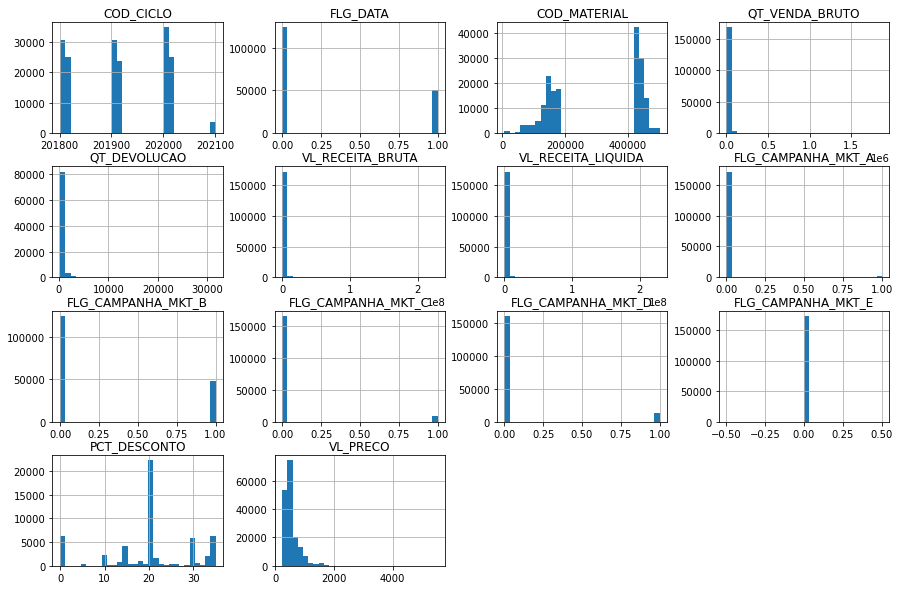

In [12]:
# HISTOGRAMA DAS VARIÁVEIS 

df.hist(bins= 30, figsize= (15,10))
plt.show()

COD_CICLO
201901    19057.203519
201818    17132.257437
202016    16909.301742
202001    16431.335975
202101    14611.783975
Name: QT_VENDA_BRUTO, dtype: float64


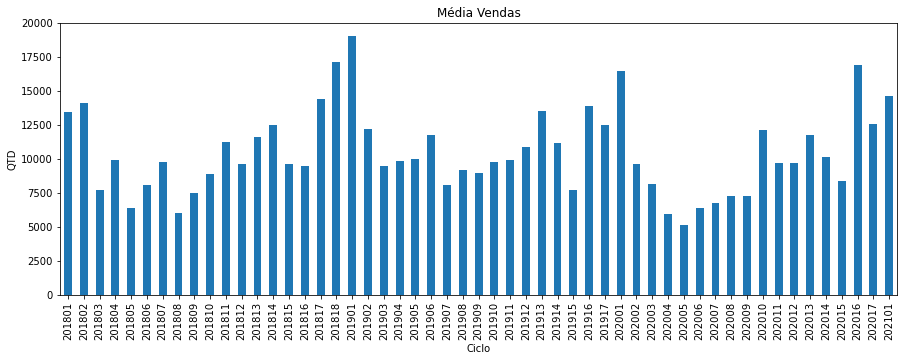

In [49]:
# MÉDIA DE VENDAS POR CICLO
# TOP 5 CICLOS COM MAIOR MÉDIA DE VENDAS

print(df.groupby('COD_CICLO')['QT_VENDA_BRUTO'].mean().sort_values(ascending=False).head())
df.groupby('COD_CICLO')['QT_VENDA_BRUTO'].mean().plot(kind = 'bar', title='Média Vendas',figsize=(15,5))
plt.xlabel('Ciclo')
plt.ylabel('QTD')
plt.show()

DES_CATEGORIA_MATERIAL
anon_S12    19825.493543
anon_S2      9766.032797
anon_S5      7205.925992
anon_S11     6504.700594
anon_S18     3767.599890
Name: QT_VENDA_BRUTO, dtype: float64


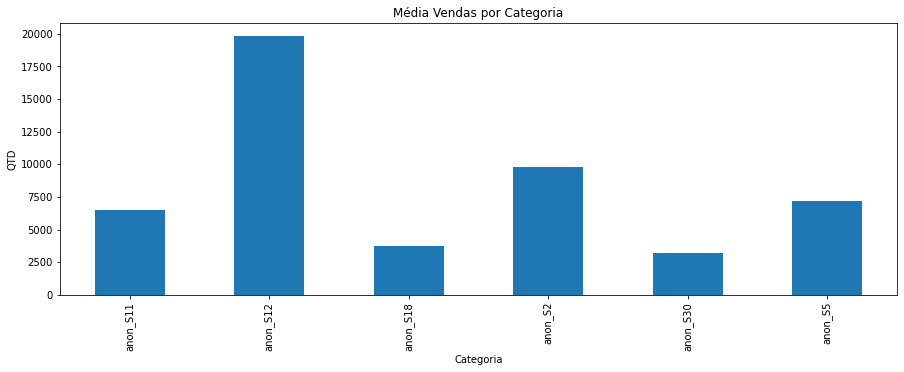

In [50]:
# MÉDIA DE VENDAS POR CATEGORIAS
# TOP 5 CATEGORIAS COM MAIOR MÉDIA DE VENDAS

print(df.groupby('DES_CATEGORIA_MATERIAL')['QT_VENDA_BRUTO'].mean().sort_values(ascending=False).head())
df.groupby('DES_CATEGORIA_MATERIAL')['QT_VENDA_BRUTO'].mean().plot(kind = 'bar', title='Média Vendas por Categoria',figsize=(15,5))
plt.xlabel('Categoria')
plt.ylabel('QTD')
plt.show()

DES_MARCA_MATERIAL
anon_S50    110087.213115
anon_S47     31400.000000
anon_S25     21680.019606
anon_S28     21673.807576
anon_S4      20846.385241
Name: QT_VENDA_BRUTO, dtype: float64


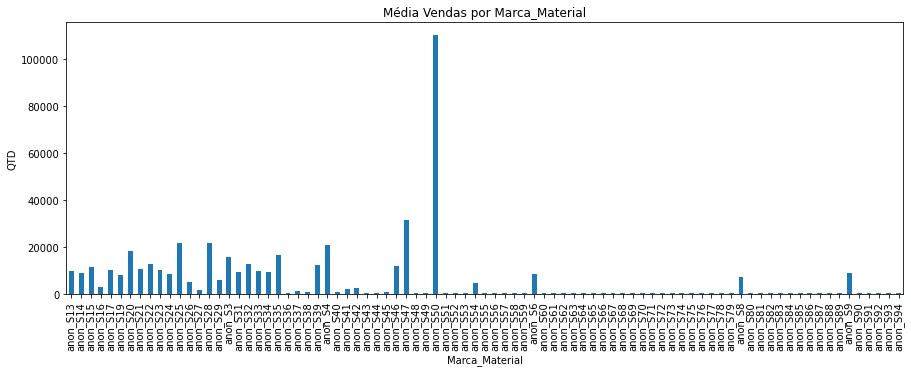

In [51]:
# MÉDIA DE VENDAS POR MARCA_MATERIAL
# TOP 5 MARCA_MATERIAL COM MAIOR MÉDIA DE VENDAS

print(df.groupby('DES_MARCA_MATERIAL')['QT_VENDA_BRUTO'].mean().sort_values(ascending=False).head())
df.groupby('DES_MARCA_MATERIAL')['QT_VENDA_BRUTO'].mean().plot(kind = 'bar', title='Média Vendas por Marca_Material',figsize=(15,5))
plt.xlabel('Marca_Material')
plt.ylabel('QTD')
plt.show()

COD_REGIAO
anon_S1     12989.936734
anon_S10     7975.005274
Name: QT_VENDA_BRUTO, dtype: float64


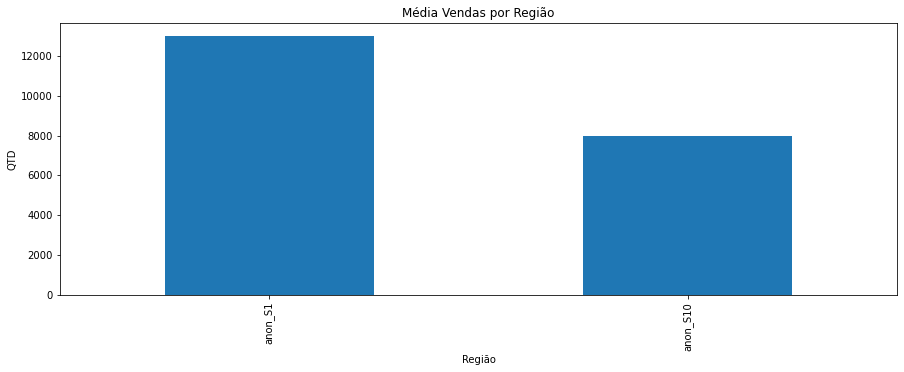

In [54]:
# MÉDIA DE VENDAS POR REGIÃO

print(df.groupby('COD_REGIAO')['QT_VENDA_BRUTO'].mean().sort_values(ascending=False))
df.groupby('COD_REGIAO')['QT_VENDA_BRUTO'].mean().plot(kind = 'bar', title='Média Vendas por Região',figsize=(15,5))
plt.xlabel('Região')
plt.ylabel('QTD')
plt.show()

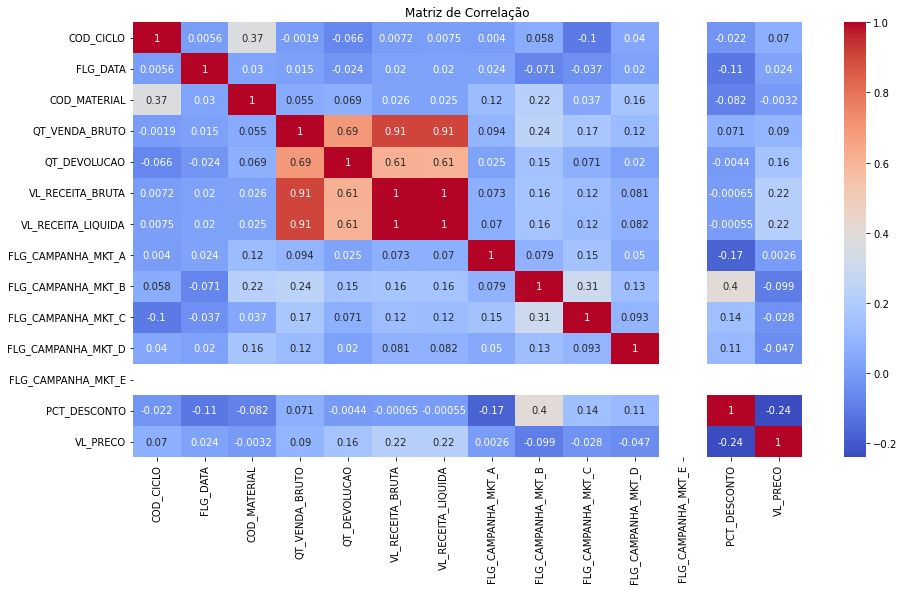

In [60]:
# Matriz de correlação entre as variáveis numéricas
# Verificamos uma correlação positiva relativamente alta em entre as variáveis com cores mais "quentes".
# Está correlação pode ter implicação em nosso modelo, causando multicolinearidade e até Data Leakage
# Vamos tratar isso na etapa de modelagem.


plt.figure(figsize=(15, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [61]:
# Salvando a base de dados pré-tratada para ser utilizada na etapa de modelagem

df.to_csv('base_eda.csv', index=False)